In [1]:
from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [1]:
from src.model import create_convnext_model
import tensorflow as tf
convnext_model = create_convnext_model((1,1))
print(convnext_model.summary())
convnext_model.compile(
        loss="binary_crossentropy",
        optimizer="adam",
        metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
        steps_per_execution=1,
    )

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



TypeError: Missing required positional argument

In [4]:
for layer in convnext_model.layers:
    print(layer.name, layer.output_shape)

input_3 [(None, 224, 224, 3)]
convnext_tiny_prestem_normalization (None, 224, 224, 3)
convnext_tiny_stem (None, 56, 56, 96)
convnext_tiny_stage_0_block_0_depthwise_conv (None, 56, 56, 96)
convnext_tiny_stage_0_block_0_layernorm (None, 56, 56, 96)
convnext_tiny_stage_0_block_0_pointwise_conv_1 (None, 56, 56, 384)
convnext_tiny_stage_0_block_0_gelu (None, 56, 56, 384)
convnext_tiny_stage_0_block_0_pointwise_conv_2 (None, 56, 56, 96)
convnext_tiny_stage_0_block_0_layer_scale (None, 56, 56, 96)
convnext_tiny_stage_0_block_0_identity (None, 56, 56, 96)
tf.__operators__.add_36 (None, 56, 56, 96)
convnext_tiny_stage_0_block_1_depthwise_conv (None, 56, 56, 96)
convnext_tiny_stage_0_block_1_layernorm (None, 56, 56, 96)
convnext_tiny_stage_0_block_1_pointwise_conv_1 (None, 56, 56, 384)
convnext_tiny_stage_0_block_1_gelu (None, 56, 56, 384)
convnext_tiny_stage_0_block_1_pointwise_conv_2 (None, 56, 56, 96)
convnext_tiny_stage_0_block_1_layer_scale (None, 56, 56, 96)
convnext_tiny_stage_0_block_1_i

In [12]:
import mlflow.keras
logged_model = 'runs:/d6bba2b75312486aa6392983f1cafb69/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.keras.load_model(logged_model)

# Predict on a Pandas DataFrame.
#import pandas as pd
#loaded_model.predict(pd.DataFrame(data))

In [36]:
validation_generator.reset()
X, y = validation_generator.next()
X[0]

array([[[0.29411766, 0.2901961 , 0.27450982],
        [0.18823531, 0.14901961, 0.15294118],
        [0.3647059 , 0.34509805, 0.32941177],
        ...,
        [0.27058825, 0.21176472, 0.23137257],
        [0.2901961 , 0.23137257, 0.2509804 ],
        [0.18039216, 0.15686275, 0.16470589]],

       [[0.30980393, 0.3137255 , 0.29411766],
        [0.35686275, 0.31764707, 0.32156864],
        [0.37254903, 0.34509805, 0.3137255 ],
        ...,
        [0.2509804 , 0.20784315, 0.23137257],
        [0.3137255 , 0.27058825, 0.29411766],
        [0.25882354, 0.2392157 , 0.25490198]],

       [[0.29803923, 0.3019608 , 0.28235295],
        [0.19215688, 0.1764706 , 0.17254902],
        [0.36078432, 0.34117648, 0.31764707],
        ...,
        [0.2901961 , 0.24313727, 0.25882354],
        [0.2901961 , 0.21568629, 0.2392157 ],
        [0.16078432, 0.15294118, 0.17254902]],

       ...,

       [[0.2627451 , 0.21176472, 0.1764706 ],
        [0.37254903, 0.38431376, 0.3019608 ],
        [0.37647063, 0

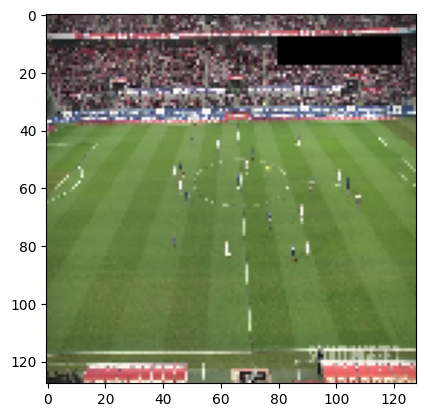

In [37]:
plt.imshow(X[0])

In [34]:
VAL_IMAGES_PATH = "./data/validation_data/"
height, width = 128, 128

test_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = test_datagen.flow_from_directory(
    VAL_IMAGES_PATH,
    target_size=(height, width),
    shuffle=False,
    class_mode="binary",
)
predictions_proba = loaded_model.predict(validation_generator).flatten()
predictions = np.where(predictions_proba < .5, 0, 1).flatten()
y_true = validation_generator.classes.flatten()

result_df = pd.DataFrame(
    {
    'Prediction':predictions,
    'Probability':predictions_proba,
    'Label':y_true,
    'Path':validation_generator.filenames
    }
)

Found 4680 images belonging to 2 classes.
147/147 [==============================] - 72s 489ms/step


In [41]:
result_df[result_df['Label'] == 0].iloc[:10]

,Prediction,Probability,Label,Path
0,0,0.003679,0,0/Ingame_Validation_0.jpg
1,0,0.003758,0,0/Ingame_Validation_1.jpg
2,0,0.003538,0,0/Ingame_Validation_10.jpg
3,0,0.003499,0,0/Ingame_Validation_100.jpg
4,0,0.200808,0,0/Ingame_Validation_1000.jpg
5,0,0.219234,0,0/Ingame_Validation_1001.jpg
6,0,0.217365,0,0/Ingame_Validation_1002.jpg
7,0,0.243984,0,0/Ingame_Validation_1003.jpg
8,0,0.244762,0,0/Ingame_Validation_1004.jpg
9,0,0.250618,0,0/Ingame_Validation_1005.jpg


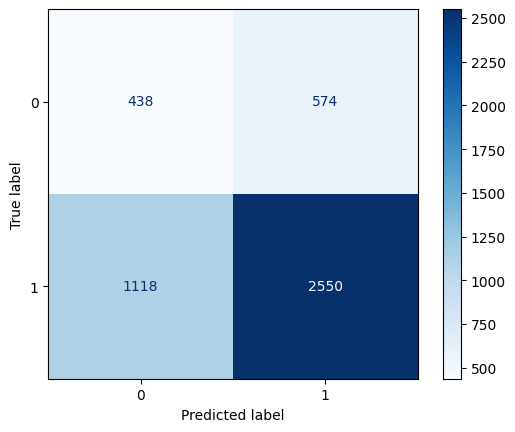

In [39]:
cm = confusion_matrix(result_df['Label'], result_df['Prediction'], labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')

In [4]:
# Evaluate on Validation data
scores = model.evaluate(validation_generator, verbose=0)
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[1], scores[1]*100))
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[2], scores[2]*100))
print("%s%s: %.2f%%" % ("evaluate ",model.metrics_names[3], scores[3]*100))

2023-04-01 01:13:58.512247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


evaluate accuracy: 20.56%
evaluate precision: 47.90%
evaluate recall: 15.57%


In [110]:
validation_generator.reset()
predictions_proba=loaded_model.predict(validation_generator)
predictions = np.where(predictions_proba < .5, 0, 1)

14/14 [==============================] - 10s 720ms/step


In [140]:
image_path = './data/validation_data/1/Break_Validation_205.jpg'

#load the image
my_image = load_img(image_path, target_size=(128, 128))
#preprocess the image

my_image = img_to_array(my_image)
my_image /= 255.
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
single_prediction_proba = loaded_model.predict(my_image)
single_prediction = np.where(single_prediction_proba < .5, 0, 1)


1/1 [==============================] - 0s 19ms/step


In [4]:
image_path = './data/validation_data/1/Break_Validation_205.jpg'

my_image = load_img(image_path, target_size=(128, 128))
